# Proyecto 1 
## Ciencia de Datos con Python
#### Carlos Alfredo Rivera Yong 23008861

In [2]:
import numpy as npy
import pandas as pds
import seaborn as sbn
import matplotlib.pyplot as mpl

In [3]:
data = pds.DataFrame(npy.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])


      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


Se importan las librerias:

In [ ]:
npy.random.shuffle(data.values)
N =int(0.8*len(data))
train = data.iloc[:N]
valid = data.iloc[N:].reset_index(drop=True)


Se decribe para cada una de las variables todas sus metricas como: conteo,media, desviacion estandar, minimo, cuartiles y maximo; usando la funcion describe de pandas.

In [ ]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


##Histogramas de cada variable

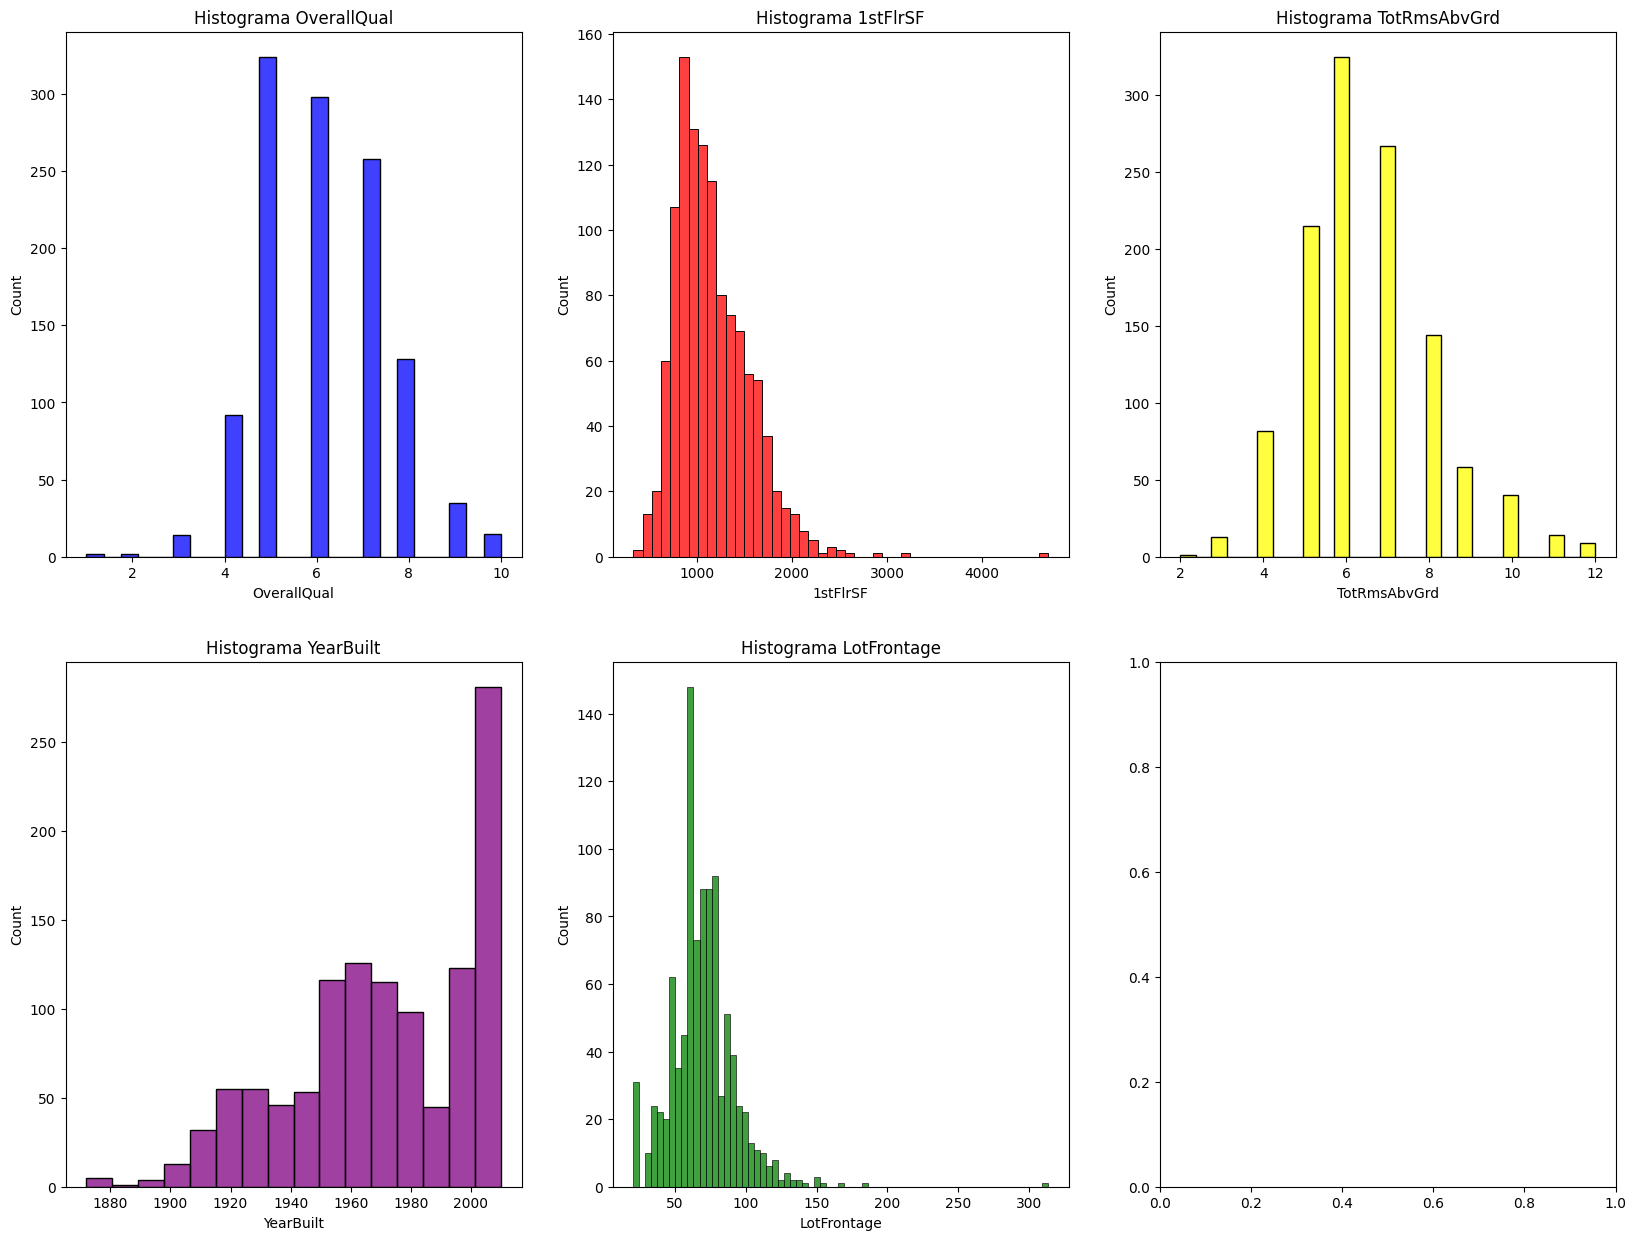

In [ ]:
figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
sbn.histplot(ax=ejes[0][0],data=train["OverallQual"], color= "blue")
sbn.histplot(ax=ejes[0][1],data=train["1stFlrSF"], color= "red")
sbn.histplot(ax=ejes[0][2],data=train["TotRmsAbvGrd"], color= "yellow")
sbn.histplot(ax=ejes[1][0],data=train["YearBuilt"], color= "purple")
sbn.histplot(ax=ejes[1][1],data=train["LotFrontage"], color= "green")
ejes[0][0].set_title("Histograma OverallQual")
ejes[0][1].set_title("Histograma 1stFlrSF")
ejes[0][2].set_title("Histograma TotRmsAbvGrd")
ejes[1][0].set_title("Histograma YearBuilt")
ejes[1][1].set_title("Histograma LotFrontage")
mpl.show()

##Dispersion variable dependiente vs independientes

C:\Users\carlo\AppData\Local\Temp\ipykernel_25068\544338849.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


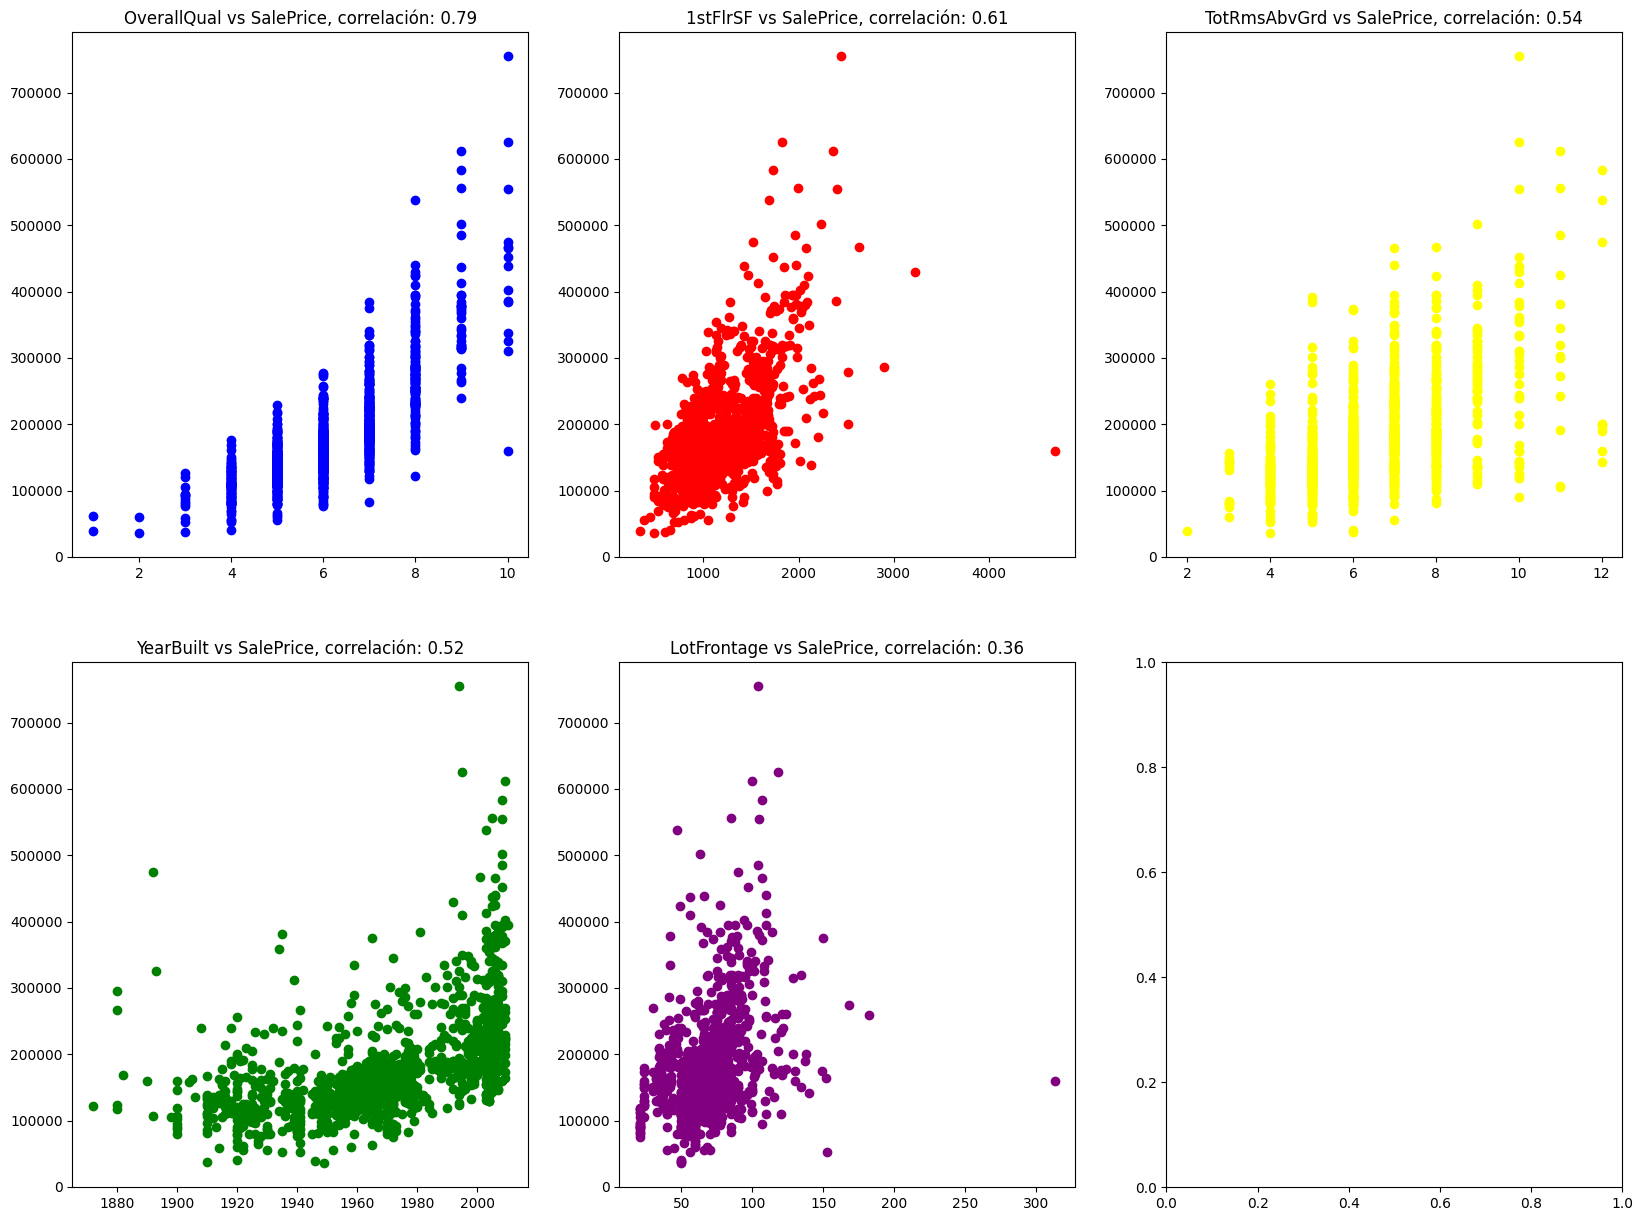

In [ ]:
cor1 = train["SalePrice"].corr(train["OverallQual"])
cor2 = train["SalePrice"].corr(train["1stFlrSF"])
cor3 = train["SalePrice"].corr(train["TotRmsAbvGrd"])
cor4 = train["SalePrice"].corr(train["YearBuilt"])
cor5 = train["SalePrice"].corr(train["LotFrontage"])

figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
ejes[0][0].scatter(x=train["OverallQual"], y=train["SalePrice"],color= "blue")
ejes[0][1].scatter(x=train["1stFlrSF"], y=train["SalePrice"],color= "red")
ejes[0][2].scatter(x=train["TotRmsAbvGrd"], y=train["SalePrice"],color= "yellow")
ejes[1][0].scatter(x=train["YearBuilt"], y=train["SalePrice"],color= "green")
ejes[1][1].scatter(x=train["LotFrontage"], y=train["SalePrice"],color= "purple")
ejes[0][0].set_title(f"OverallQual vs SalePrice, correlación: {round(cor1,2)}")
ejes[0][1].set_title(f"1stFlrSF vs SalePrice, correlación: {round(cor2,2)}")
ejes[0][2].set_title(f"TotRmsAbvGrd vs SalePrice, correlación: {round(cor3,2)}")
ejes[1][0].set_title(f"YearBuilt vs SalePrice, correlación: {round(cor4,2)}")
ejes[1][1].set_title(f"LotFrontage vs SalePrice, correlación: {round(cor5,2)}")
figura.show()

Se observa que la variable OverallQual y 

funcion de regresion lineal recibe como parametros x que es una variable independiente, y variable a explicar, recibe epochs que es la cantidad de iteraciones a realizar para entrenar el modelo, recibe imprimir error cada que es una variable para debuggear como va mejorando el modelo, alpha que es el learning rate del modelo. 

Se crean dos arreglos models y errors, son para guardar los coeficientes del modelo en cada iteracion y el error de cada iteracion. 
Para que la funcion este vectorizada se agrega un arreglo de 1's a la x y se inicializo un arreglo de coeficientes en 0, luego se entrena el modelo por la candidad de epochs que se recibio como parametro, en cada iteracion se hacen cuatro cosas 1. calcular el resultado para cada valor de x utilizando los coeficientes 2. calcular el error utilizando el y real y el y calculado previamente. 3. se calculan los nuevos coeficientes sumandole alpha* el gradiente si el alpha es muy grande puede que el modelo converja rapido o puede que nunca logre converjer y si el alpha es muy pequeño se necesitan muchas iteraciones para que el modelo converja. 4. Se guarda en los arreglos models y errors los respectivos coeficientes y el error de la iteracion. Retornando los dos arreglos.

In [ ]:
def regresion(x,y,epochs,imprimir_error_cada,alpha):

    models = []
    errors = []
    coefs = [0,0]
    x = npy.array([x,npy.ones(len(x))])
    for i in range(epochs):
        y1= npy.dot(coefs,x)
        error= (1/2*len(y))*(npy.sum(npy.square(y-y1)))
        if (i % imprimir_error_cada == 0):
            print(f'El error en la iteración {i} es {error}')
        coefs = coefs+(1/len(y)*(npy.dot((y-y1),x.T)))*alpha
        models.append(coefs)
        errors.append(error)
    return models, errors           

        

Recibir un arreglo y graficarlo

In [ ]:
def graph(errors):
    mpl.plot(errors,color="red")
    mpl.title("Curva de error")
    mpl.show()

Recibe x variable independiente, y independiente, el arreglo de modelos y cada cuando graficas el modelo. Hace un diagrama de dispersion de las dos variables y sobre el va graficando el modelo, x_line arreglo de 0 a max(x) teniendo 1000 valores de por medio, y line y el plot de valores en x y y

In [ ]:
def model_graph(x,y,models,models_cada):
    mpl.figure(figsize=(10,15))
    mpl.scatter(x,y,color="red")
    for i,model in enumerate(models):
        if (i%models_cada==0):
            x_line = npy.linspace(0, max(x),1000)
            y_line = npy.dot(model,npy.array([x_line,npy.ones(len(x_line))]))
            mpl.plot(x_line,y_line,color="blue")
    mpl.show()        
        

usando mi funcion regresion con la variable independiente OverallQual (1000 iteraciones se imprime cada 100 y tiene un learningrate de 0.0001, 

El error en la iteración 0 es 2.645723742459625e+16
El error en la iteración 100 es 1.2947703555661508e+16
El error en la iteración 200 es 6886785205752709.0
El error en la iteración 300 es 4167516508530066.0
El error en la iteración 400 es 2947401991452200.0
El error en la iteración 500 es 2399848574084821.0
El error en la iteración 600 es 2154024343424055.0
El error en la iteración 700 es 2043564118064910.5
El error en la iteración 800 es 1993831997897832.5
El error en la iteración 900 es 1971344308318112.2


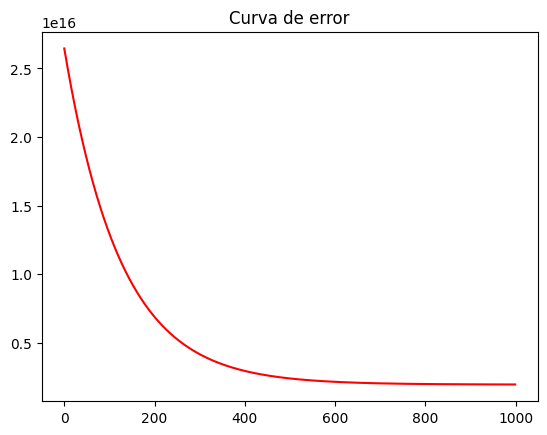

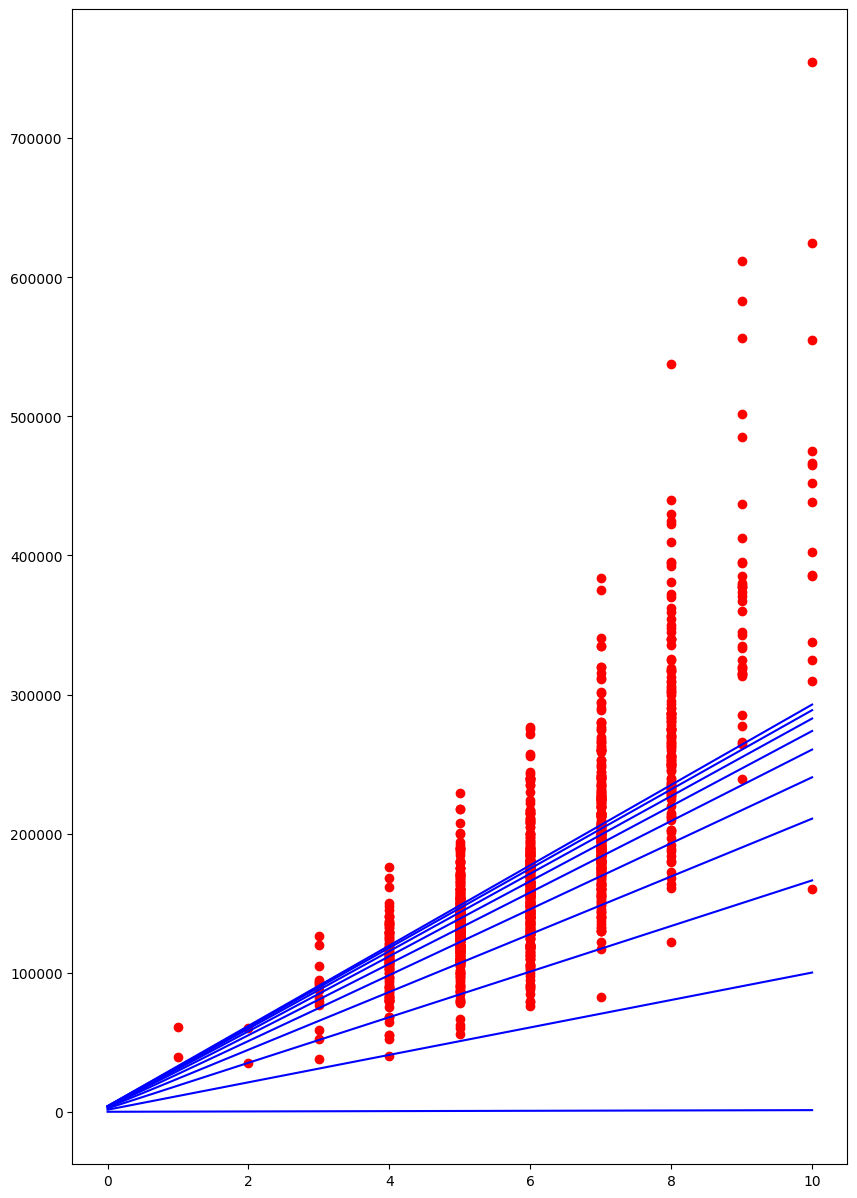

In [ ]:
models1,error1 = regresion(train["OverallQual"],train["SalePrice"],epochs=1000,imprimir_error_cada=100,alpha=0.0001)
graph(error1)
model_graph(train["OverallQual"],train["SalePrice"],models_cada=100,models=models1)


usando mi funcion regresion con la variable independiente 1stFlr probando con valores mas grandes de alpha pero nunca logra converjer y por eso se usa un leaningrate bajo ,utilizando pocas iteraciones porque al tener un learning rate bajo converje mas rapido (500 iteraciones se imprime cada 50 y tiene un learningrate de 0.00000001)

El error en la iteración 0 es 2.645723742459625e+16
El error en la iteración 10 es 2.02900330059083e+16
El error en la iteración 20 es 1.5731384597573136e+16
El error en la iteración 30 es 1.2361741903604394e+16
El error en la iteración 40 es 9870983488266382.0
El error en la iteración 50 es 8029875083766079.0
El error en la iteración 60 es 6668972261323710.0
El error en la iteración 70 es 5663025795677599.0
El error en la iteración 80 es 4919454487542400.0
El error en la iteración 90 es 4369824552651548.0
El error en la iteración 100 es 3963551392131910.5
El error en la iteración 110 es 3663244093430866.0
El error en la iteración 120 es 3441264197953064.5
El error en la iteración 130 es 3277182025292818.5
El error en la iteración 140 es 3155896449602657.5
El error en la iteración 150 es 3066245083741291.0
El error en la iteración 160 es 2999976960995998.0
El error en la iteración 170 es 2950993166248297.0
El error en la iteración 180 es 2914785528890112.0
El error en la iteración 190 

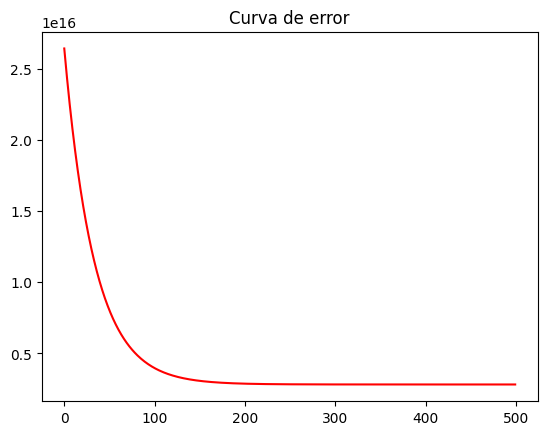

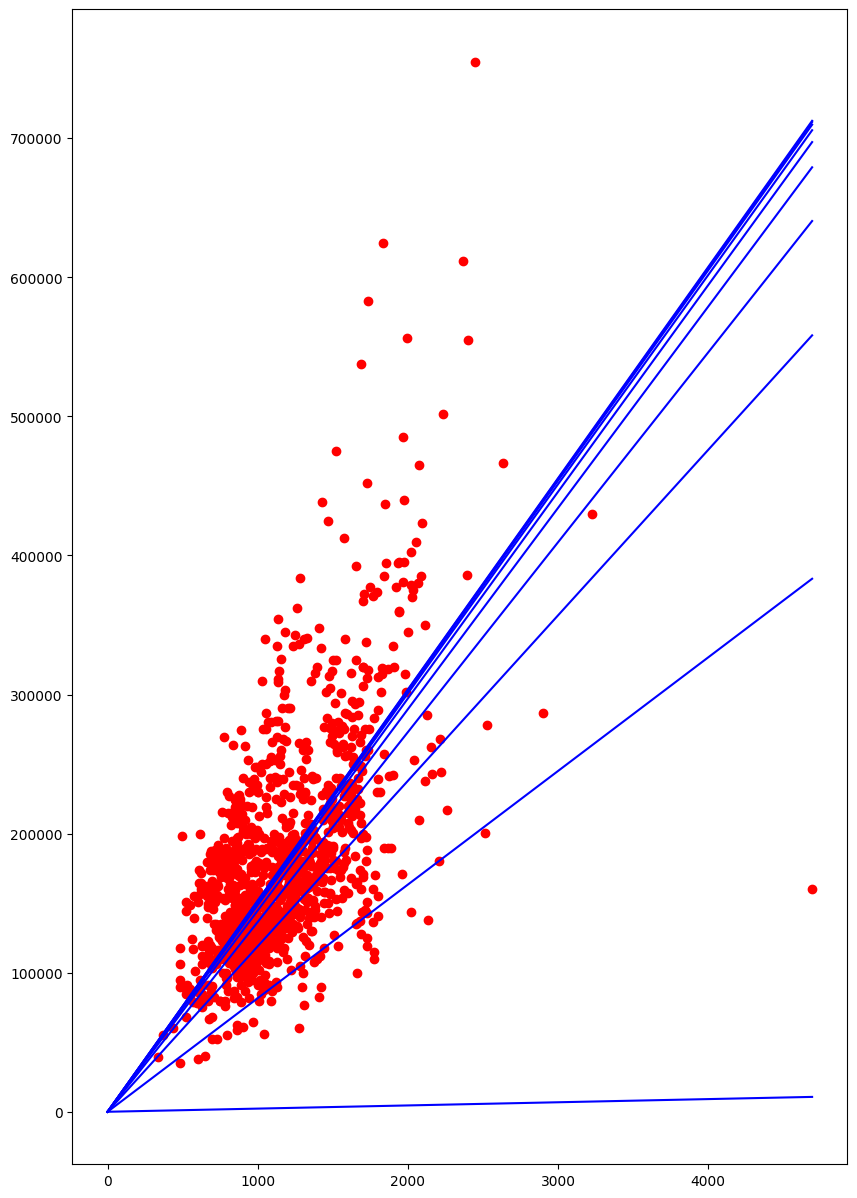

In [ ]:
models2,error2 = regresion(train["1stFlrSF"],train["SalePrice"],epochs=500,imprimir_error_cada=10,alpha=0.00000001)
graph(error2)
model_graph(train["1stFlrSF"],train["SalePrice"],models_cada=50,models=models2)

Se intala el LinearRegression de Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression 

Se crean los dos modelos para las dos variables independientes utilizando el metodo fit de LinearRegression, recibe x, recibe y dependiente

In [ ]:
regresion_x1 = LinearRegression().fit(npy.asarray(train["OverallQual"]).reshape(-1,1),npy.asarray(train["SalePrice"]))
regresion_x2 = LinearRegression().fit(npy.asarray(train["1stFlrSF"]).reshape(-1,1),npy.asarray(train["SalePrice"]))

Utiliza los modelos creados previamente para sacar predicciones dado un arreglo de datos, recibe el primer modelo el segundo retornando un promedio de los dos modelos y las predicciones para modelo manual y de sklearn.

In [ ]:
def averagemodel(model1,model2,data):
    model1_prediction = npy.dot(model1,npy.array([data,npy.ones(len(data))]))
    model2_prediction = model2.predict(npy.asarray(data).reshape(-1,1))
    model_average = (model1_prediction + model2_prediction)/2
    return model1_prediction,model2_prediction,model_average

Utilizamos el set de validacion 20% para hacer predicciones con los tres modelos en ambas variables, encontrando el error para cada una de ellas. meti todos los errores en un nuevo DF y Se describe con pandas el conteo el error promedio -------

In [ ]:
variable1_modelo1, variable1_modelo2,variable1_average = averagemodel(models1[-1],regresion_x1,valid["OverallQual"])
variable2_modelo1, variable2_modelo2,variable2_average = averagemodel(models2[-1],regresion_x2,valid["1stFlrSF"])

error_variable1_modelo1 = abs(valid["SalePrice"]-variable1_modelo1)
error_variable1_modelo2 = abs(valid["SalePrice"]-variable1_modelo2)
error_variable1_modelaverage = abs(valid["SalePrice"]-variable1_average)

error_variable2_modelo1 = abs(valid["SalePrice"]-variable2_modelo1)
error_variable2_modelo2 = abs(valid["SalePrice"]-variable2_modelo2)
error_variable2_modelaverage = abs(valid["SalePrice"]-variable2_average)

error_df = pds.DataFrame({"Error_variable1_modelo1": error_variable1_modelo1,
                            "Error_variable1_modelo2": error_variable1_modelo2,
                            "Error_variable1_Average": error_variable1_modelaverage,
                            "Error_variable2_modelo1": error_variable2_modelo1,
                            "Error_variable2_modelo2": error_variable2_modelo2,
                            "Error_variable2_Average": error_variable2_modelaverage})

error_df.describe()


,Error_variable1_modelo1,Error_variable1_modelo2,Error_variable1_Average,Error_variable2_modelo1,Error_variable2_modelo2,Error_variable2_Average
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,35976.049537,32298.727093,32951.312981,47313.954592,47320.995624,47133.251658
std,39448.567246,35963.259126,37094.596216,43467.216587,42504.840688,42817.847806
min,142.166401,1.146609,143.961850,149.406022,280.023589,267.908405
25%,13412.999237,8990.840072,10330.192013,17812.371689,19398.499888,17448.197632
50%,26927.694655,24550.000000,23550.000000,37991.922471,38883.797234,38199.261462
75%,48947.779382,43574.040624,42246.557857,63946.980060,63817.503798,63037.592064
max,449490.169455,387204.984114,418347.576784,378642.844926,410873.713051,394758.278988


Se grafican el comportamiento del error con cada modelo y cada variable, variable 1 modelo2 y para variable 2 el promedio, si quiero predecir SalesPrice con la variable 1, sk learn y para variable 2 un promedio del manual y de sklearn.

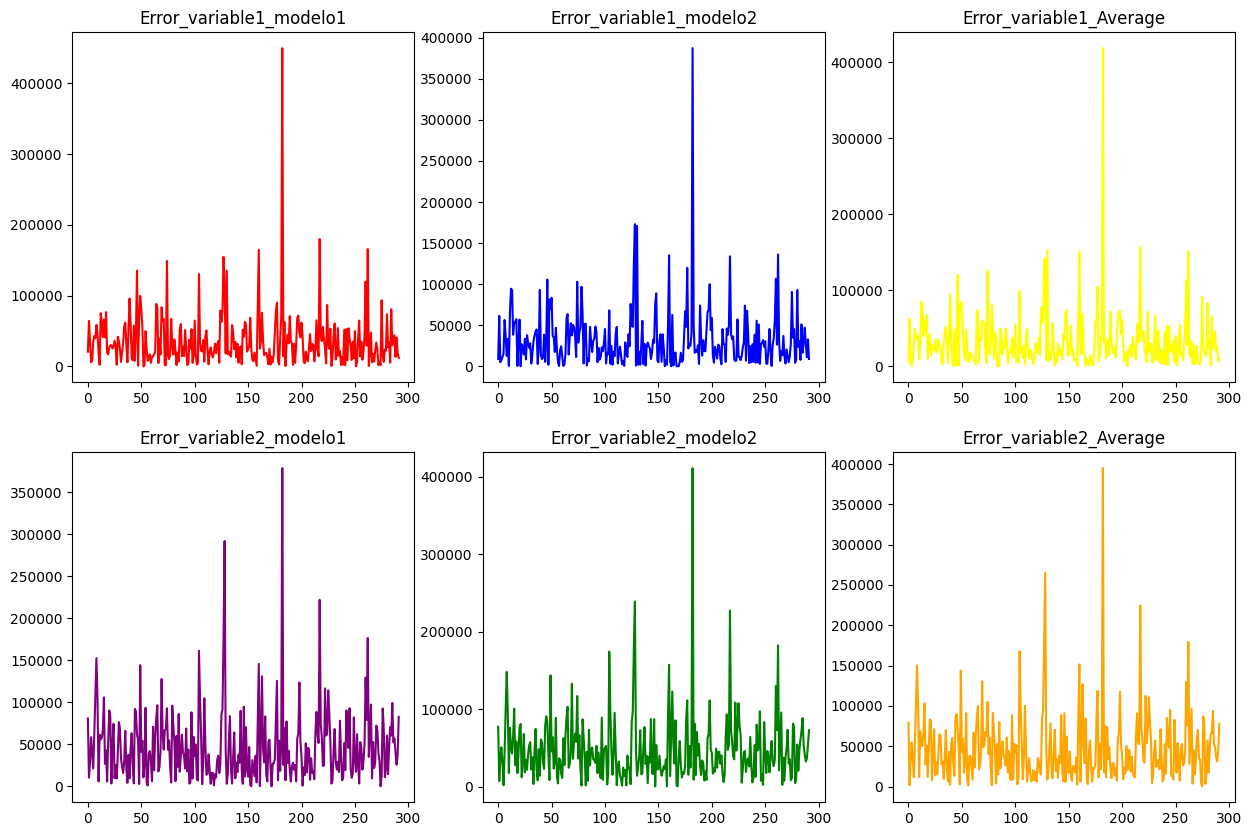

In [ ]:
figura, ejes = mpl.subplots(nrows=2,ncols=3,figsize=(15,10))
index=0
colors=["red","blue","yellow","purple","green","orange"]
for i in range(2):
    for j in range(3):
        ejes[i][j].plot(error_df.iloc[:,index],color=colors[index])
        ejes[i][j].set_title(error_df.columns[index])
        index += 1
mpl.show()       

NO SE AJUSTA - EL RANGO ES GRANDE Y DESVE GRANDE.
VIDEO